In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data, validation_data, test_data = tfds.load(
name = "imdb_reviews",
split=('train[:60%]', 'train[60%:]', 'test'),
as_supervised = True)

Dataset imdb_reviews downloaded and prepared to C:\Users\shaik\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [6]:
## hub layer
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [7]:
hub_layer

In [8]:
#model

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [10]:
#compile the model

model.compile(optimizer='adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [11]:
#evaluate the model

result = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 2s - loss: 1.0305 - accuracy: 0.4615


In [14]:
for i, v in zip(model.metrics_names, result):
    print("%s: %.3f" %(i, v))

loss: 1.031
accuracy: 0.461


In [15]:
#training the data
training = model.fit(train_data.batch(512),verbose=1, epochs=20)

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.7680 - accuracy: 0.4961
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.6699 - accuracy: 0.5524
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.6313 - accuracy: 0.5986
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.5986 - accuracy: 0.6384
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5647 - accuracy: 0.6747
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5277 - accuracy: 0.7129
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4881 - accuracy: 0.7467
Epoch 8/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4479 - accuracy: 0.7801
Epoch 9/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4092 - accuracy: 0.8090
Epoch 10/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3735 - accuracy: 0.8308
Epoch 11/

Text(0.5, 1.0, 'Epochs VS Accuracy')

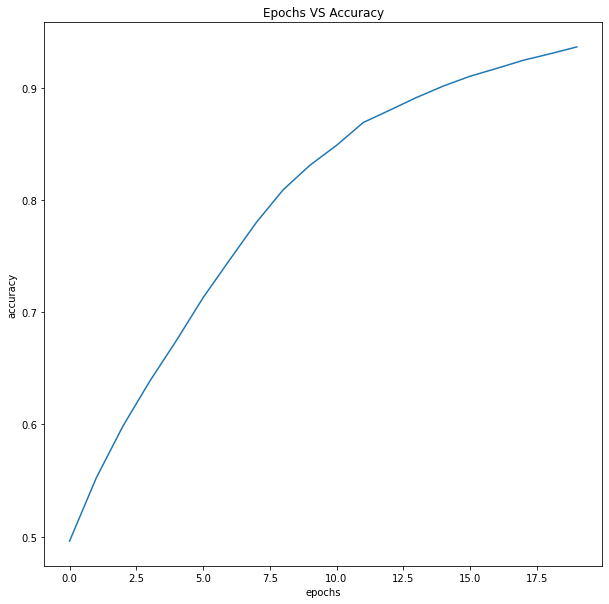

In [20]:
# Accuracy vs Epoch graph

plt.figure(figsize=(10,10))
plt.plot(training.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Epochs VS Accuracy')

Text(0.5, 1.0, 'Epochs VS Loss')

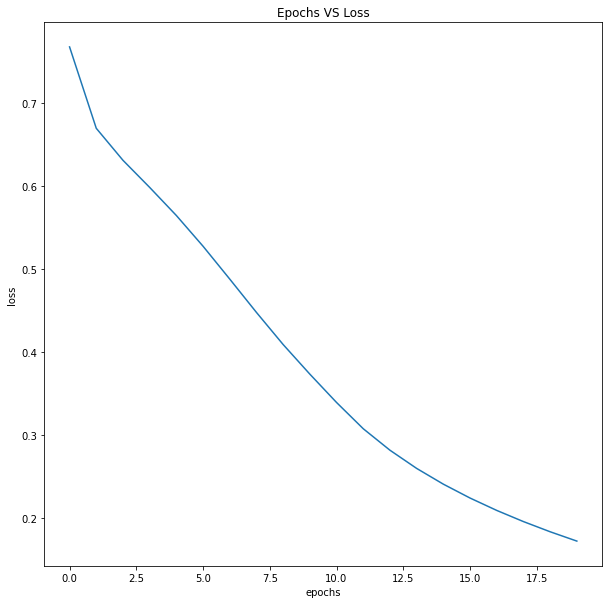

In [21]:
# Loss vs Epoch graph

plt.figure(figsize=(10,10))
plt.plot(training.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Epochs VS Loss')